In [7]:
import pandas as pd
import pandas_datareader.data as web
import matplotlib.pyplot as plt
import datetime
from datetime import date
%matplotlib inline

In [8]:
start = date(2016, 1, 1)
end = date.today()

In [9]:
stock_price = web.DataReader('TWTR', 'google', start, end)
stock_price.tail()

,Open,High,Low,Close,Volume
Date,,,,,
2017-06-15,16.53,16.89,16.46,16.83,11890455
2017-06-16,16.75,16.81,16.55,16.67,9939429
2017-06-19,16.77,17.08,16.75,17.06,11318878
2017-06-20,17.15,17.15,16.84,16.91,8524617
2017-06-21,17.11,18.04,17.11,17.78,23615192


In [10]:
stock_price['MA'] = stock_price['Close'].rolling(window=10).mean()
stock_price.tail()

,Open,High,Low,Close,Volume,MA
Date,,,,,,
2017-06-15,16.53,16.89,16.46,16.83,11890455,17.364
2017-06-16,16.75,16.81,16.55,16.67,9939429,17.200
2017-06-19,16.77,17.08,16.75,17.06,11318878,17.083
2017-06-20,17.15,17.15,16.84,16.91,8524617,17.017
2017-06-21,17.11,18.04,17.11,17.78,23615192,17.051


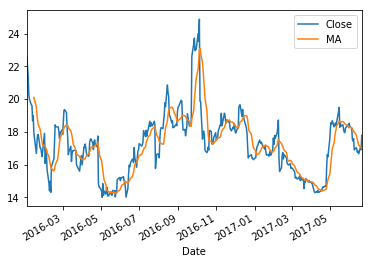

In [11]:
stock_price[["Close", "MA"]].plot()

<Container object of 370 artists>

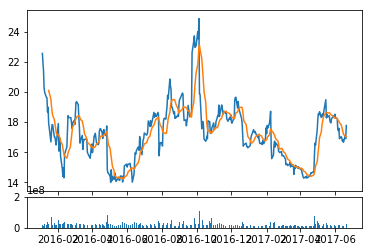

In [16]:
price_fig = plt.subplot2grid((6,1), (0,0), rowspan=5, colspan=1)
volume_fig = plt.subplot2grid((6,1), (5,0), rowspan=1, colspan=1, sharex=price_fig)
price_fig.plot(stock_price.index, stock_price['Close'])
price_fig.plot(stock_price.index, stock_price['MA'])
volume_fig.bar(stock_price.index, stock_price['Volume'])